In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=12,6

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('cleaned_data.csv', index_col=0)

In [4]:
df.head()

,Directed by,Produced by,Written by,Based on,Starring,Music by,Distributed by,Story by,Narrated by,Cinematography,...,Vietnamese,Icelandic,Scots,Irish,English,Gaelic,Hindi,Norwegian,Chinese,country1
Academy Award Review of Walt Disney Cartoons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,United States
Snow White and the Seven Dwarfs,"['David Hand (supervising)', 'William Cottrell...",Walt Disney,"['Ted Sears', 'Richard Creedon', 'Otto England...",Snow Whiteby The Brothers Grimm,"['Adriana Caselotti', 'Lucille La Verne', 'Har...","['Frank Churchill', 'Paul Smith', 'Leigh Harli...",RKO Radio Pictures,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,United States
Pinocchio,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,NaN,The Adventures of Pinocchioby Carlo Collodi,"['Cliff Edwards', 'Dickie Jones', 'Christian R...","['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures,"['Ted Sears', 'Otto Englander', 'Webb Smith', ...",NaN,NaN,...,0,0,0,0,1,0,0,0,0,United States
Fantasia,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",NaN,NaN,"['Leopold Stokowski', 'Deems Taylor']",See program,"['Walt Disney Productions', 'RKO Radio Pictures']","['Joe Grant', 'Dick Huemer']",Deems Taylor,James Wong Howe,...,0,0,0,0,1,0,0,0,0,United States
The Reluctant Dragon,Alfred Werker (live action)Hamilton Luske (ani...,Walt Disney,Live-action:Ted SearsAl PerkinsLarry ClemmonsB...,NaN,Robert BenchleyFrances GiffordBuddy PepperNana...,Frank ChurchillLarry Morey,RKO Radio Pictures,NaN,NaN,Bert Giennon,...,0,0,0,0,1,0,0,0,0,United States


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, Academy Award Review of Walt Disney Cartoons to Mulan
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Directed by         416 non-null    object 
 1   Produced by         411 non-null    object 
 2   Written by          198 non-null    object 
 3   Based on            206 non-null    object 
 4   Starring            388 non-null    object 
 5   Music by            413 non-null    object 
 6   Distributed by      418 non-null    object 
 7   Story by            136 non-null    object 
 8   Narrated by         53 non-null     object 
 9   Cinematography      335 non-null    object 
 10  Edited by           387 non-null    object 
 11  Screenplay by       185 non-null    object 
 12  production_company  420 non-null    object 
 13  release_date        420 non-null    object 
 14  running_time        417 non-null    float64
 15  budget           

In [6]:
df1 = df.iloc[:,12:] # working only with the columns after release date

# Adding extra month and a year column

In [7]:
df1['release_date'] = pd.to_datetime(df1['release_date'])

In [8]:
df1['month_of_release'] = df1['release_date'].dt.month
df1['year_of_release'] = df1['release_date'].dt.year

# Exploring which month has been most profitable

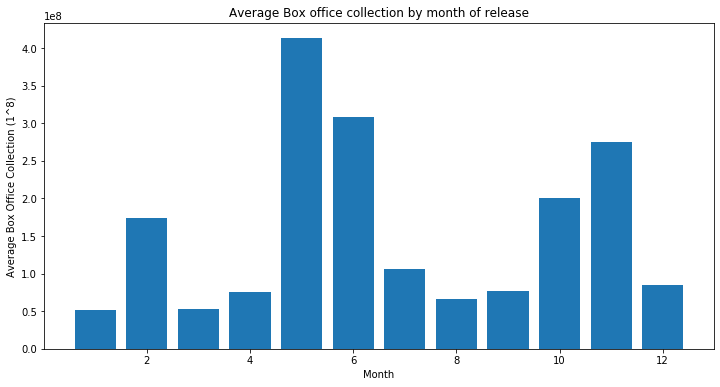

In [9]:
plt.bar(range(1,13), df1.groupby('month_of_release').mean()['box_office'])
plt.title('Average Box office collection by month of release')
plt.xlabel('Month')
plt.ylabel('Average Box Office Collection (1^8)');

# Exploring Box Office Collection by the number of languages it was released in

In [10]:
lang = df1.iloc[:,5:26]

In [11]:
df1['no_of_langs'] = lang.apply(lambda x:x.sum(), axis=1)

In [12]:
df1['no_of_langs'].value_counts()

1    402
2     13
5      2
3      2
0      2
Name: no_of_langs, dtype: int64

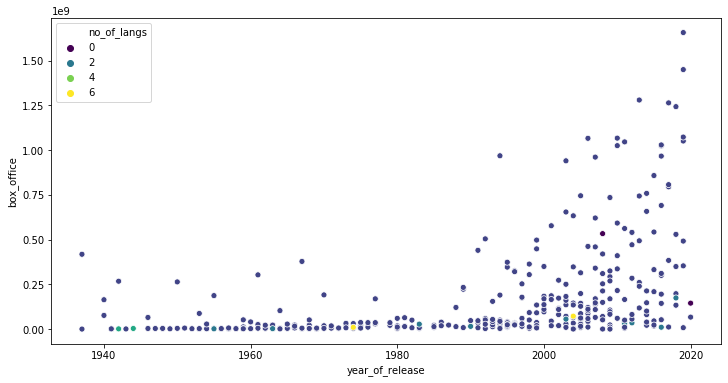

In [13]:
sns.scatterplot(df1['year_of_release'], df1['box_office'], hue=df1['no_of_langs'], palette='viridis')

# Budget and Box office

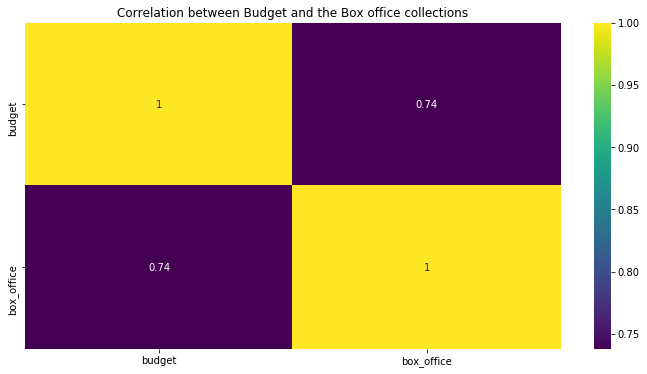

In [14]:
sns.heatmap(df1[['budget', 'box_office']].corr(), annot=True, cmap='viridis')
plt.title('Correlation between Budget and the Box office collections');

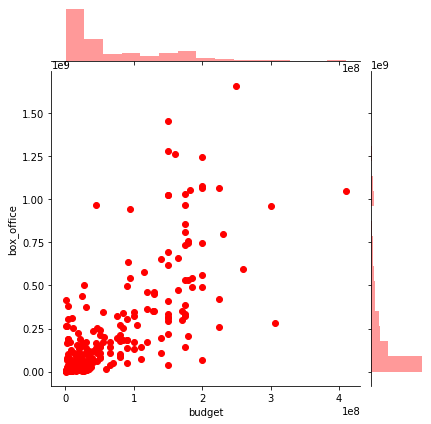

In [15]:
# looks like budget and box office are highly correlated with each other
sns.jointplot(df1['budget'], df1['box_office'], color='r')

# running time with budget and box_office

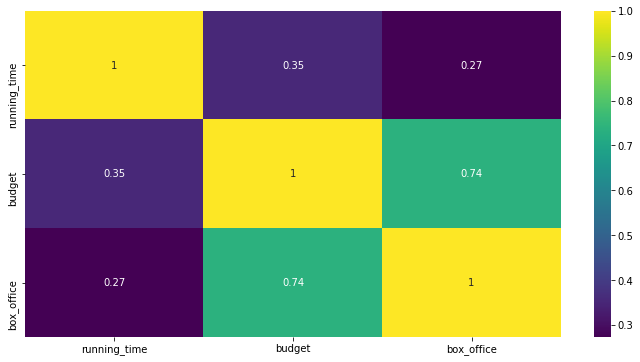

In [16]:
sns.heatmap(df1[['running_time', 'budget', 'box_office']].corr(), annot=True, cmap='viridis')


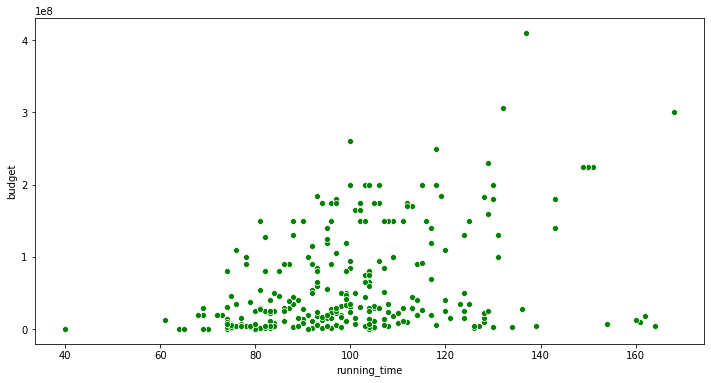

In [17]:
sns.scatterplot('running_time', 'budget', data=df1, color='g');

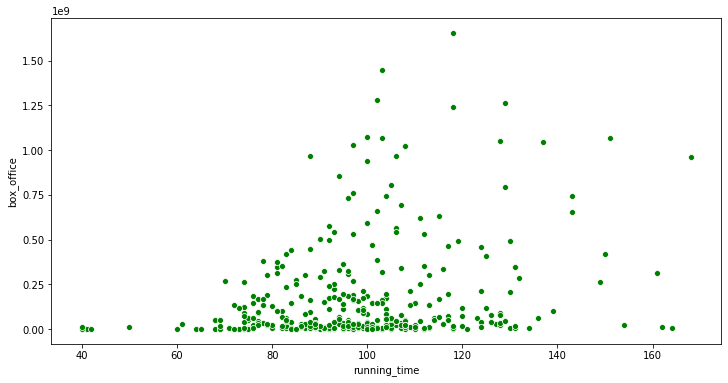

In [18]:
sns.scatterplot('running_time', 'box_office', data=df1, color='g');
# 100 - 120 minutes movies are most successful

# Revenue generated for each movie

In [20]:
df1['revenue'] = df1[['budget', 'box_office']].apply(lambda x: x[1] - x[0], axis=1)

# Top 20 most successful movies

In [21]:
list(df1.sort_values(by=['revenue'], ascending=False).iloc[:20].index)

['The Lion King',
 'Frozen II',
 'Frozen',
 'Beauty and the Beast',
 'Incredibles 2',
 'The Lion King',
 'Alice in Wonderland',
 'Zootopia',
 'Toy Story 4',
 'Aladdin',
 'Toy Story 3',
 'Finding Dory',
 'Finding Nemo',
 "Pirates of the Caribbean:  Dead Man's Chest",
 'The Jungle Book',
 'Inside Out',
 "Pirates of the Caribbean:  At World's End",
 'Pirates of the Caribbean:On Stranger Tides',
 'Coco',
 'Maleficent']

# List of 20 greatest flops 

In [22]:
list_by_flops = df1[['budget', 'box_office']].apply(lambda x: x[0]-x[1], axis=1)
list(list_by_flops.sort_values(ascending=False).iloc[:20].index)

['Mulan',
 'Mars Needs Moms',
 'Shipwrecked',
 'Mighty Joe Young',
 'Around the World in 80 Days',
 'Treasure Planet',
 'Onward',
 'My Favorite Martian',
 'John Carter',
 'Anaganaga O Dheerudu',
 'Tall Tale',
 'Meet the Deedles',
 'The Finest Hours',
 "I'll Be Home for Christmas",
 'The Country Bears',
 'Return to Oz',
 'Newsies',
 'Something Wicked This Way Comes',
 'The Greatest Game Ever Played',
 'James and the Giant Peach']

# Stats of  successful and flop films

In [23]:
sort_by_revenue = df1.sort_values(by=['revenue'], ascending=False)

In [24]:
successful = sort_by_revenue[sort_by_revenue['revenue'] > 0].describe()
successful

,running_time,budget,box_office,Russian,Spanish,Swedish,Telugu,Luganda,Portuguese,German,...,Irish,English,Gaelic,Hindi,Norwegian,Chinese,month_of_release,year_of_release,no_of_langs,revenue
count,226.000000,2.260000e+02,2.260000e+02,226.000000,226.0,226.000000,226.0,226.0,226.0,226.0,...,226.0,226.000000,226.0,226.000000,226.000000,226.0,226.000000,226.000000,226.000000,2.260000e+02
mean,99.814159,6.732445e+07,2.602731e+08,0.004425,0.0,0.004425,0.0,0.0,0.0,0.0,...,0.0,0.973451,0.0,0.008850,0.004425,0.0,7.004425,1996.977876,1.039823,1.929486e+08
std,19.665220,7.261396e+07,3.161839e+08,0.066519,0.0,0.066519,0.0,0.0,0.0,0.0,...,0.0,0.161117,0.0,0.093863,0.066519,0.0,3.411742,20.133652,0.317221,2.640375e+08
min,40.000000,3.000000e+05,7.990000e+05,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,1937.000000,0.000000,1.100000e+04
25%,85.250000,1.125000e+07,4.480000e+07,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.000000,0.000000,0.0,4.000000,1992.250000,1.000000,2.252500e+07
50%,98.000000,3.150000e+07,1.373500e+08,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.000000,0.000000,0.0,7.000000,2003.000000,1.000000,8.655000e+07
75%,108.750000,1.137500e+08,3.447000e+08,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.000000,0.000000,0.0,10.000000,2010.000000,1.000000,2.451000e+08
max,168.000000,4.106000e+08,1.657000e+09,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,1.000000,1.000000,0.0,12.000000,2019.000000,5.000000,1.407000e+09


In [25]:
flops=sort_by_revenue[sort_by_revenue['revenue'] < 0].describe()
flops

,running_time,budget,box_office,Russian,Spanish,Swedish,Telugu,Luganda,Portuguese,German,...,Irish,English,Gaelic,Hindi,Norwegian,Chinese,month_of_release,year_of_release,no_of_langs,revenue
count,33.000000,3.400000e+01,3.400000e+01,34.0,34.0,34.0,34.000000,34.000000,34.0,34.0,...,34.0,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,3.400000e+01
mean,100.909091,5.454458e+07,3.414703e+07,0.0,0.0,0.0,0.029412,0.029412,0.0,0.0,...,0.0,0.911765,0.0,0.058824,0.029412,0.029412,6.323529,1997.382353,1.147059,-2.039755e+07
std,19.190433,6.755082e+07,5.421256e+07,0.0,0.0,0.0,0.171499,0.171499,0.0,0.0,...,0.0,0.287902,0.0,0.238833,0.171499,0.171499,3.548116,15.147787,0.743960,2.867079e+07
min,69.000000,2.000000e+06,1.000000e+06,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1953.000000,0.000000,-1.332000e+08
25%,88.000000,1.647894e+07,8.900000e+06,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,1.000000,0.0,0.000000,0.000000,0.000000,3.000000,1990.500000,1.000000,-2.227500e+07
50%,95.000000,2.600000e+07,1.525000e+07,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,1.000000,0.0,0.000000,0.000000,0.000000,6.500000,1998.000000,1.000000,-1.140000e+07
75%,114.000000,6.375000e+07,3.482500e+07,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,1.000000,0.0,0.000000,0.000000,0.000000,9.750000,2004.750000,1.000000,-3.825000e+06
max,162.000000,3.066000e+08,2.841000e+08,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,12.000000,2020.000000,5.000000,-3.000000e+05
